# Projet 6 - Feature text

# Import des librairies et des données

In [1]:
!pip install pandas matplotlib numpy seaborn scikit-learn missingno plotly nltk string
!pip freeze > requirements.txt

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import missingno as msno
import plotly.express as px
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


# Vérifier les versions des packages
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.3.3
NumPy version: 2.3.5
Seaborn version: 0.13.2


In [3]:
# Téléchargements nécessaires (à exécuter une seule fois)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')
df = data.copy()
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
688,bc2aaae47829fd5825f6cc2ec51c2c5f,2015-12-31 09:19:31 +0000,http://www.flipkart.com/whiteherbs-ultra-prote...,Whiteherbs Ultra Protection Sunscreen Lotion -...,"[""Beauty and Personal Care >> Body and Skin Ca...",SNRE82YYYKFZFACZ,450.0,270.0,bc2aaae47829fd5825f6cc2ec51c2c5f.jpg,False,Flipkart.com: Buy Whiteherbs Ultra Protection ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",..."
482,a76bf8400b3dbcdbe5a5678f4a8ea0f6,2016-01-07 05:50:25 +0000,http://www.flipkart.com/arb-hp-pavilion-dv5t-1...,ARB HP Pavilion dv5t-1000 Replacement 6 Cell L...,"[""Computers >> Laptop Accessories >> Batteries...",ACCDX9Y3ZR9EUGXJ,3499.0,1499.0,a76bf8400b3dbcdbe5a5678f4a8ea0f6.jpg,False,Buy ARB HP Pavilion dv5t-1000 Replacement 6 Ce...,No rating available,No rating available,ARB,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
114,bc784846bd59a16832454416ac708003,2016-01-03 09:39:44 +0000,http://www.flipkart.com/lollipop-lane-tiddly-w...,Lollipop Lane Tiddly Wink Safari Bath Set,"[""Baby Care >> Baby Grooming >> Baby Grooming ...",BBCDPFZM6V585ZZE,2950.0,2950.0,bc784846bd59a16832454416ac708003.jpg,True,Flipkart.com is offering Lollipop Lane Tiddly ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Age Group""..."
98,5749bae8ccead7997ebf370b6b081d07,2016-01-04 00:20:04 +0000,http://www.flipkart.com/kuber-industries-bangl...,Kuber Industries Bangle Four Roll & Ring & Ear...,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANE97CQUZGNYATF,1998.0,999.0,5749bae8ccead7997ebf370b6b081d07.jpg,False,Buy Kuber Industries Bangle Four Roll & Ring &...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
396,387ecd9ec173d61b6dc5ceddc079b150,2015-12-01 06:13:00 +0000,http://www.flipkart.com/denver-brave-caliber-c...,"Denver Brave,Caliber Combo Set","[""Beauty and Personal Care >> Fragrances >> De...",CAGEBTJBRFGAUQQB,379.0,340.0,387ecd9ec173d61b6dc5ceddc079b150.jpg,False,"Flipkart.com: Buy Denver Brave,Caliber Combo S...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."


On va garder principalement la description et le product_category_tree

# Analyse exploratoire

In [5]:
# Shape du dataframe
print("La shape du DataFrame est :")
print(df.shape)
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\n" + "-"*50 + "\n")

# Informations générales sur le DataFrame
print("Informations générales sur le DataFrame :")
print(df.info())

La shape du DataFrame est :
(1050, 15)
Nombre de lignes : 1050
Nombre de colonnes : 15

--------------------------------------------------

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  prod

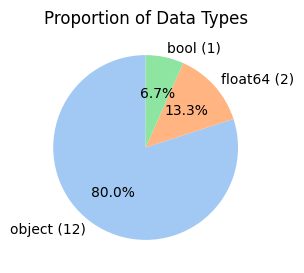

object     12
float64     2
bool        1
Name: count, dtype: int64


In [6]:
# Pie Chart of Data Types
plt.figure(figsize=(3, 3))
df.dtypes.value_counts().plot(kind='pie', labels = [f"{dtype} ({count})" for dtype, count in zip (df.dtypes.value_counts().index, df.dtypes.value_counts().values) ],
                                                    autopct='%1.1f%%', 
                                                    startangle=90, 
                                                    colors=sns.color_palette("pastel"))
#value counts permet de compter le type de variable contenu dans chaque colonne
plt.title("Proportion of Data Types")
plt.ylabel("")  # On cache le label de y-axis
plt.show()
print(df.dtypes.value_counts())

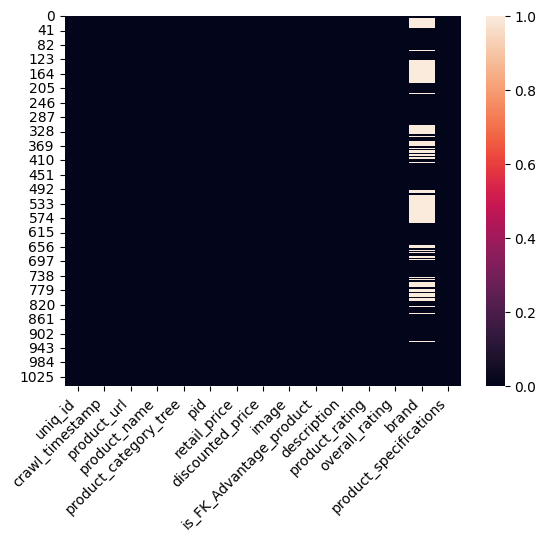

In [7]:
#Visualisation des valeurs manquantes sous forme de heatmap

sns.heatmap(df.isna())
plt.xticks(rotation=45, ha='right'); #Ajouter ; me permet de ne pas avoir les infos de type (array([...]), [...]) devant mon graphe
plt.show()

In [8]:
#Affichage du pourcentage de valeurs manquantes sous forme textuelle

list_variable = ['brand']
for name_variable in list_variable:
    print(f"Le pourcentage de valeurs manquantes de {name_variable} est {df[name_variable].isna().sum()/df.shape[0]*100:.2f} %")

Le pourcentage de valeurs manquantes de brand est 32.19 %


# Extraction de features

In [9]:
df.sample(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
264,a4951eb41979fe482879f777c8f21d2b,2015-12-01 12:40:44 +0000,http://www.flipkart.com/unique-handicrafts-inl...,Unique Handicrafts Inlaid Marble Box Showpiece...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIE7PD3EF2NCGBY,2400.0,1200.0,a4951eb41979fe482879f777c8f21d2b.jpg,False,Unique Handicrafts Inlaid Marble Box Showpiece...,No rating available,No rating available,Unique Handicrafts,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
171,cab75cad4b3a3c593c753a1759df28e2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-we-re-all-mad...,Prithish We're All Mad Here Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGE8F5RDEYMH4YH,499.0,175.0,cab75cad4b3a3c593c753a1759df28e2.jpg,False,Buy Prithish We're All Mad Here Ceramic Mug fo...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
69,5a7a1287fef0d986a5e237797beee286,2016-04-19 05:00:32 +0000,http://www.flipkart.com/gayatri-creations-oran...,GAYATRI CREATIONS ORANGE KIDS SET 2 Containers...,"[""Kitchen & Dining >> Containers & Bottles >> ...",LBXEHH5WRYQQGNSM,695.0,399.0,5a7a1287fef0d986a5e237797beee286.jpg,False,Specifications of GAYATRI CREATIONS ORANGE KID...,No rating available,No rating available,GAYATRI CREATIONS,"{""product_specification""=>[{""key""=>""Series"", ""..."
989,216c6c3527984be3d7ad9023d5cd9bd1,2016-01-04 03:25:23 +0000,http://www.flipkart.com/kaatru-surya-bhagavan-...,Kaatru Surya Bhagavan Showpiece - 23.5 cm,"[""Home Decor & Festive Needs >> Table Decor & ...",SHIECCF7HXG7JT6G,485.0,399.0,216c6c3527984be3d7ad9023d5cd9bd1.jpg,False,Buy Kaatru Surya Bhagavan Showpiece - 23.5 c...,No rating available,No rating available,Kaatru,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
667,5eec66ec172ce096cd4e5c947686b56a,2015-12-31 09:19:31 +0000,http://www.flipkart.com/rtd-baby-girl-s-kurta-...,RTD Baby Girl's Kurta and Pyjama Set,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",ETHECM6WDWQATHHH,1183.0,599.0,5eec66ec172ce096cd4e5c947686b56a.jpg,False,RTD Baby Girl's Kurta and Pyjama Set - Buy Yel...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
177,5dbf978ab2cf9d2da6446d3e4595f690,2015-12-01 12:40:44 +0000,http://www.flipkart.com/printland-pmr1834-cera...,Printland PMR1834 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Printland...",MUGEBFGF4ZDPGTZZ,650.0,299.0,5dbf978ab2cf9d2da6446d3e4595f690.jpg,False,Printland PMR1834 Ceramic Mug (350 ml)\r\n ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
478,a0133654f3911e47f021da4e49d42926,2016-03-18 07:48:11 +0000,http://www.flipkart.com/cotonex-yellow-green-c...,"Cotonex Yellow, Green Cotton Kitchen Linen Set","[""Home Furnishing >> Kitchen & Dining Linen >>...",KLSEGUGFRDBSSEDM,350.0,299.0,a0133654f3911e47f021da4e49d42926.jpg,False,"Cotonex Yellow, Green Cotton Kitchen Linen Set...",No rating available,No rating available,Cotonex,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
515,9823c07cc256788556e424307f5ae9b6,2016-01-07 05:50:25 +0000,http://www.flipkart.com/noise-nosww032-m-famou...,Noise NOSWW032 I M Famous Analog Watch - For ...,"[""Watches >> Wrist Watches >> Noise Wrist Watc...",WATDJYPXSKYGWPXF,999.0,999.0,9823c07cc256788556e424307f5ae9b6.jpg,True,Noise NOSWW032 I M Famous Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
764,e24ef34ede03630207f0d367f633d8ea,2015-12-12 11:46:53 +0000,http://www.flipkart.com/chappin-nellson-cnl-50...,Chappin & Nellson CNL-50-White-RG Analog Watch...,"[""Watches >> Wrist Watches >> Chappin & Nellso...",WATDW8E5PGWQUFWY,1999.0,799.0,e24ef34ede03630207f0d367f633d8ea.jpg,Fa

In [10]:
df['categorie'] = df['product_category_tree'].str.replace(r'^\s*\[\s*"', '', regex=True).str.split('>>').str[0].str.strip()
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie
206,8962b50b699ddf4712ad18d29c6a3862,2015-12-01 12:40:44 +0000,http://www.flipkart.com/orange-tree-dune-wall-...,Orange Tree Dune Wall Decor Set Of 3 Showpiece...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIE5HBGWKWJWFRA,1799.0,1529.0,8962b50b699ddf4712ad18d29c6a3862.jpg,False,Orange Tree Dune Wall Decor Set Of 3 Showpiece...,No rating available,No rating available,Orange Tree,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs
709,dbca6ab4ebf827884073e2890388b744,2016-01-01 19:37:22 +0000,http://www.flipkart.com/u-me-cotton-plastic-di...,U & ME Cotton Plastic Diaper Reuseable Pad Sma...,"[""Baby Care >> Diapering & Potty Training >> N...",NPYEYC9ZV2CUG9H3,350.0,270.0,dbca6ab4ebf827884073e2890388b744.jpg,False,U & ME Cotton Plastic Diaper Reuseable Pad Sma...,No rating available,No rating available,U & ME,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Baby Care
235,e1e133cbe616bee3b3e9e6f4f0882e3d,2015-12-01 12:40:44 +0000,http://www.flipkart.com/celebrity-wheel-pizza-...,Celebrity Wheel Pizza Cutter,"[""Kitchen & Dining >> Kitchen Tools >> Kitchen...",PACEBCKNZUYD9YGX,699.0,199.0,e1e133cbe616bee3b3e9e6f4f0882e3d.jpg,False,Celebrity Wheel Pizza Cutter (Carbon Steel Pac...,No rating available,No rating available,Celebrity,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Kitchen & Dining


On va commencer par faire le lemming, stemming, et tokenizing

In [11]:
#df['description_cleaned']

# Initialisation des outils NLTK
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # 1. Tokenization
    tokens = word_tokenize(text.lower())

    # 2. Stemming
    stems = [stemmer.stem(token) for token in tokens]

    # 3. Lemmatization
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]

    return {
        "tokens": tokens,
        "stems": stems,
        "lemmas": lemmas
    }

# Application sur une colonne
df['description_cleaned'] = df["description"].apply(preprocess)

# Si tu veux des colonnes séparées :
#df["tokens"] = df["processed"].apply(lambda x: x["tokens"])
#df["stems"] = df["processed"].apply(lambda x: x["stems"])
#df["lemmas"] = df["processed"].apply(lambda x: x["lemmas"])

df['description_cleaned'].sample(3)


In [12]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopword_set = set(stopwords.words('english'))

def process_text_en(text, remove_stopwords=True, remove_punct=True):
    if not isinstance(text, str):
        return []

    # 1) Tokenization
    tokens = word_tokenize(text.lower())

    processed_tokens = []
    for tok in tokens:
        # 2) Suppression ponctuation
        if remove_punct and all(ch in string.punctuation for ch in tok):
            continue

        # 3) Suppression stopwords
        if remove_stopwords and tok in stopword_set:
            continue

        # 4) Lemmatization
        lemma = lemmatizer.lemmatize(tok)

        # 5) Stemming du lemme
        stemmed = stemmer.stem(lemma)

        processed_tokens.append(stemmed)

    return processed_tokens

# Application sur la colonne
df['description_cleaned'] = df['description'].apply(process_text_en)
df.sample(3)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie,description_cleaned
474,0f4f761de4224b004402c1f97e871ba4,2016-04-16 13:01:18 +0000,http://www.flipkart.com/art-n-beyond-150013/p/...,Art n Beyond 150013,"[""Kitchen & Dining >> Bar & Glassware >> Bar G...",GLSEHEHRX2AEPMY4,1050.0,677.0,0f4f761de4224b004402c1f97e871ba4.jpg,False,Key Features of Art n Beyond 150013 Elegant de...,No rating available,No rating available,Art n Beyond,"{""product_specification""=>[{""key""=>""Sales Pack...",Kitchen & Dining,"[key, featur, art, n, beyond, 150013, eleg, de..."
604,85aec4bf3185da7ebcc45003429cbfe2,2016-01-07 04:32:43 +0000,http://www.flipkart.com/hp-15-ac116tx-notebook...,HP 15-ac116TX (Notebook) (Core i3 (5th Gen)/ 4...,"[""Computers >> Laptops >> HP Laptops""]",COMEAZ945RHFFGUS,38890.0,38890.0,85aec4bf3185da7ebcc45003429cbfe2.jpg,True,Buy HP 15-ac116TX (Notebook) (Core i3 (5th Gen...,5,5,HP,"{""product_specification""=>[{""key""=>""Included S...",Computers,"[buy, hp, 15-ac116tx, notebook, core, i3, 5th,..."
797,9d20743a61f62fe6f9cdc5ff24d46d23,2015-12-12 11:46:53 +0000,http://www.flipkart.com/oxyglow-golden-glow-ox...,Oxyglow Golden Glow Oxy Bleach & Fruit Massage...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEBFJXQJZDCUPB,630.0,523.0,9d20743a61f62fe6f9cdc5ff24d46d23.jpg,False,Oxyglow Golden Glow Oxy Bleach & Fruit Massage...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty...",Beauty and Personal Care,"[oxyglow, golden, glow, oxi, bleach, fruit, ma..."


In [13]:
df['description_cleaned'][0]

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'r',
 '899',
 'curtain',
 'enhanc',
 'look',
 'interiors.thi',
 'curtain',
 'made',
 '100',
 'high',
 'qualiti',
 'polyest',
 'fabric.it',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring.it',
 'make',
 'room',
 'environ',
 'romant',
 'loving.thi',
 'curtain',
 'ant-',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'apparance.g',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyou',
 'beauti',

In [14]:
docs = [
    "chat chat chien",
    "chat souris",
    "chien souris",
    "chien souris chien"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['chat' 'chien' 'souris']
[[0.92693676 0.3752176  0.        ]
 [0.77722116 0.         0.62922751]
 [0.         0.70710678 0.70710678]
 [0.         0.89442719 0.4472136 ]]


In [15]:
list_description = df['description_cleaned'].to_list()
list_description

[['key',
  'featur',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '213',
  'cm',
  'height',
  'pack',
  '2',
  'price',
  'r',
  '899',
  'curtain',
  'enhanc',
  'look',
  'interiors.thi',
  'curtain',
  'made',
  '100',
  'high',
  'qualiti',
  'polyest',
  'fabric.it',
  'featur',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring.it',
  'make',
  'room',
  'environ',
  'romant',
  'loving.thi',
  'curtain',
  'ant-',
  'wrinkl',
  'anti',
  'shrinkag',
  'eleg',
  'apparance.g',
  'home',
  'bright',
  'modernist',
  'appeal',
  'design',
  'surreal',
  'attent',
  'sure',
  'steal',
  'heart',
  'contemporari',
  'eyelet',
  'valanc',
  'curtain',
  'slide',
  'smoothli',
  'draw',
  'apart',
  'first',
  'thing',
  'morn',
  'welcom',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morn',
  'whole',
  'wor

In [16]:
list_description_str = [' '.join(tokens) for tokens in list_description]


In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_description_str)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['00' '000' '001' ... 'zoom' 'zora' 'zyxel']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(f'le nombre de colonnes, qui est aussi le nombre de mots uniques, est de : {X.shape[0]}')

le nombre de colonnes, qui est aussi le nombre de mots uniques, est de : 1050


In [19]:
list_words = list(vectorizer.get_feature_names_out())

In [20]:
print(list_words)

['00', '000', '001', '0021', '004', '005', '006', '0083', '01', '011', '01433cmgi', '01727lpln', '01741lpln', '01784bmli', '02', '03', '03918cmli', '04', '04615cmgi', '050', '052', '05712lmli', '05tg', '06', '063', '06362cmgi', '064', '069', '07', '07034lmli', '074', '08', '085', '09', '09321cmgi', '099', '10', '100', '1000', '1001', '10024982', '1008ax', '101', '1010', '1014tx', '1015', '1015nr', '101b0101', '1020el', '1033', '1038', '104', '1042', '1045', '1049', '105key', '107', '1071', '1075', '107750', '108', '1080', '1085', '10890', '1092', '1099', '109b0109', '10btsc2012gb', '11', '110', '1100', '11000026', '111', '112', '1132', '1141ym22', '1142301', '1143', '1148', '1149', '1150', '1153', '1155', '1170', '1183', '119', '1195', '1199', '11n', '11oz', '12', '120', '1200', '12011ppgw', '121', '1216', '122', '1234', '12399', '1240sg', '1241ea', '125', '125g', '125prog', '126', '129', '1290', '1295', '1299', '12v', '12x12', '12x18', '13', '130', '132', '1333', '13400', '1345', '134

In [21]:
list_words.index('curtain')

1678

In [22]:
X.sample(3)

AttributeError: 'csr_matrix' object has no attribute 'sample'

In [ ]:
df_tfifd_features = pd.DataFrame(X.toarray())
df_tfifd_features[1678]

0       0.530441
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1045    0.000000
1046    0.000000
1047    0.000000
1048    0.000000
1049    0.000000
Name: 1678, Length: 1050, dtype: float64

In [ ]:
df.head(1)['description_cleaned'].to_list()

[['key',
  'featur',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '213',
  'cm',
  'height',
  'pack',
  '2',
  'price',
  'r',
  '899',
  'curtain',
  'enhanc',
  'look',
  'interiors.thi',
  'curtain',
  'made',
  '100',
  'high',
  'qualiti',
  'polyest',
  'fabric.it',
  'featur',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring.it',
  'make',
  'room',
  'environ',
  'romant',
  'loving.thi',
  'curtain',
  'ant-',
  'wrinkl',
  'anti',
  'shrinkag',
  'eleg',
  'apparance.g',
  'home',
  'bright',
  'modernist',
  'appeal',
  'design',
  'surreal',
  'attent',
  'sure',
  'steal',
  'heart',
  'contemporari',
  'eyelet',
  'valanc',
  'curtain',
  'slide',
  'smoothli',
  'draw',
  'apart',
  'first',
  'thing',
  'morn',
  'welcom',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morn',
  'whole',
  'wor

Je fais un sanity check pour vérifier que tout est bon